In [1]:
from yaml import load, Loader
import pandas as pd
from util.analysis_utils import get_all_results, merge_results_patients, prep_patients_df, plot_exps, boxplot_sex_dice, boxplot_ethn_dice
from util.classes import EXPERIMENTS, SEEDS

%load_ext autoreload
%autoreload 2

In [2]:
og_df = pd.read_csv('/vol/aimspace/projects/ukbb/data/tabular/ukb668815_imaging.csv')
patients_df = prep_patients_df(og_df)

/tmp/ipykernel_3723794/1831496144.py:1: DtypeWarning: Columns (20,68,1186,1187,1188,1258,1259,1260,1552,2745,2746,2747,2748,2749,2750,2751,2752,2753,2754,2755,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783,2784,2785,2786,2787,2788,2789,2790,2791,2792,2793,2794,2795,2796,2797,2856,2857,2858,2859,2860,2861,2862,2863,2864,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876,2877,2878,2879,2880,2881,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891,2892,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2973,2974,2975,2976,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,3010,3011,3012,3013,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023,3024,3025,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3

# Experiments
## Sex Controlled Test Set Results

In [26]:
columns = ['experiment', 'model', 'train_set', 'test_set', 'dice_mean', 'dice_lv', 'dice_rv', 'dice_myo', 'male', 'male_lv', 'male_rv', 'male_myo', 'female', 'female_lv', 'female_rv', 'female_myo', 'white', 'asian', 'black', 'low_scores_prcnt']
sex_df = pd.DataFrame(columns=columns)

for exp, _ in EXPERIMENTS.items():
    cfg = load(open(f'configs/ukbb/test/exp{exp}/sex.yaml', 'r'), Loader=Loader)
    for seed in SEEDS:
        test_sex_df = pd.read_csv(f'outputs/results/csv/ukbb/exp{exp}/seed{seed}/sex.csv')
        test_sex_merged_df = merge_results_patients(test_sex_df, patients_df)
        res_df = get_all_results(test_sex_merged_df, cfg)
        sex_df = pd.concat([sex_df, res_df], ignore_index=True)

/tmp/ipykernel_3723794/3854075686.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sex_df = pd.concat([sex_df, res_df], ignore_index=True)


In [27]:
sex_df

,experiment,model,train_set,test_set,dice_mean,dice_lv,dice_rv,dice_myo,male,male_lv,...,male_myo,female,female_lv,female_rv,female_myo,white,asian,blacklow_scores_prcnt,black,low_scores_prcnt
0,2,unimatch unet,805,962,87.152064,91.591529,84.868635,84.996027,87.224825,91.634144,...,85.412008,87.074698,91.546217,85.124156,84.553722,87.358651,86.060951,NaN,85.681839,6.484953
1,2,unimatch unet,805,962,86.939519,91.127248,84.737929,84.953381,87.050456,91.369345,...,85.391194,86.821562,90.869831,85.106993,84.487862,87.257848,85.474876,NaN,85.716307,7.037785
2,2,unimatch unet,805,962,86.984155,91.120098,84.928500,84.903868,87.138131,91.380949,...,85.372573,86.820436,90.842740,85.213064,84.405504,87.250865,85.732151,NaN,85.485353,7.081050
3,2,unimatch unet,805,962,86.908528,91.215736,84.528242,84.981606,86.916770,91.287981,...,85.288101,86.899764,91.138919,84.904659,84.655715,87.192860,85.488080,NaN,85.596982,7.032978
4,2,unimatch unet,805,962,87.245658,91.459576,85.212491,85.064906,87.265935,91.509128,...,85.492287,87.224098,91.406889,85.654926,84.610479,87.523718,85.935900,NaN,85.355556,6.470532
5,2,unimatch unet,805,962,86.691256,91.049849,84.536959,84.486960,87.023612,91.565826,...,85.292856,86.337868,90.501220,84.882318,83.630066,86.997003,85.108000,NaN,85.070310,7.157966
6,2,unimatch unet,805,962,86.492066,90.869115,84.233721,84.373363,86.764385,91.246227,...,85.051994,86.202515,90.468140,84.487617,83.651788,86.730208,85.078028,NaN,85.308458,7.234881
7,2,unimatch unet,805,962,87.532357,91.485647,85.072994,86.038430,87.636018,91.623392,...,86.422720,87.422136,91.339186,85.297402,85.629821,87.807899,86.277869,NaN,86.118520,6.513797
8,2,unimatch unet,805,962,86.642874,91.266763,83.915769,84.746090,86.856392,91.383085,...,85.158142,86.415844,91.143080,83.796490,84.307963,86.889473,85.651878,NaN,85.491510,7.129122
9,2,unimatch unet,805,962,86.773650,91.063618,84.856436,84.400896,86.851632,91.337990,...,84.940864,86.690733,90.771884,85.473558,83.826758,87.119939,85.200757,NaN,85.125653,7.008941


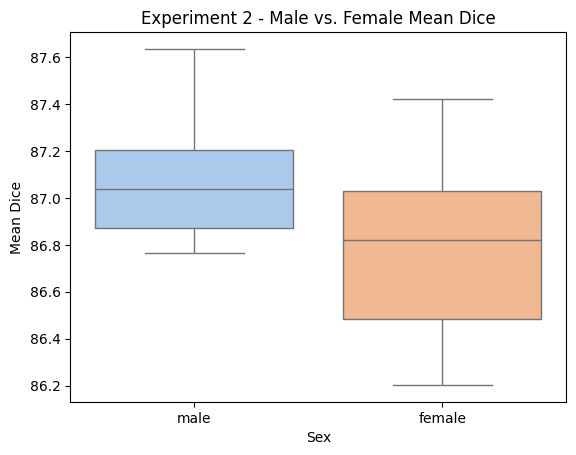

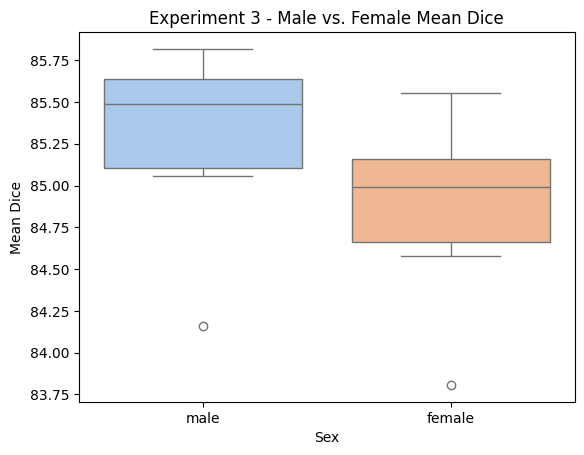

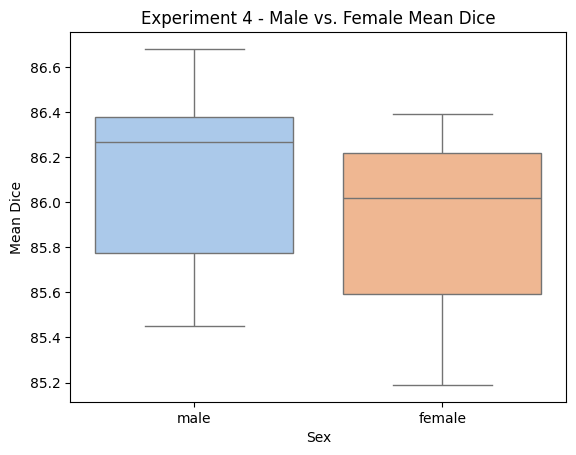

In [21]:
boxplot_sex_dice(sex_df, 'male', 'female')

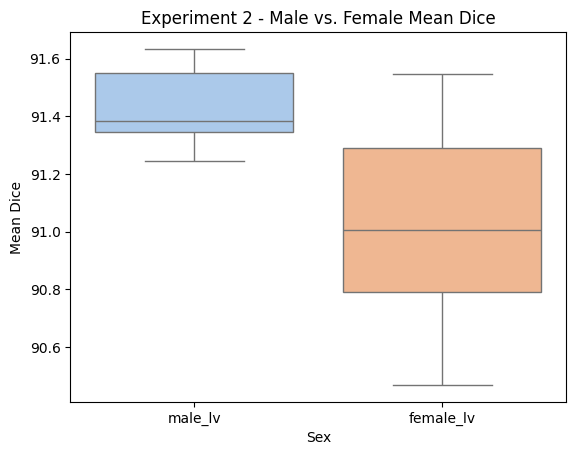

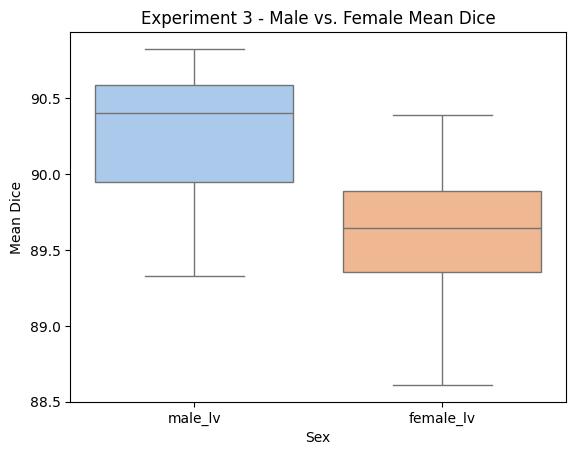

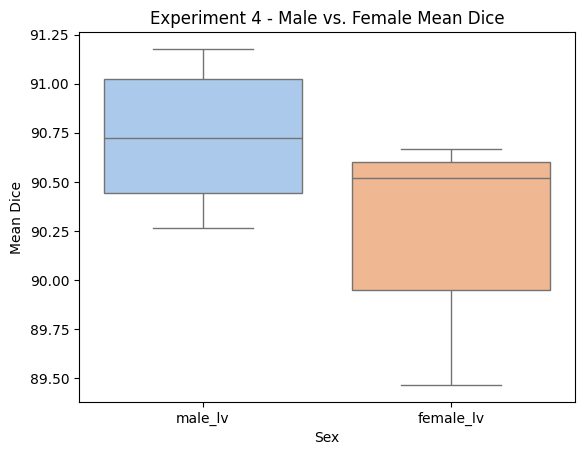

In [22]:
boxplot_sex_dice(sex_df, 'male_lv', 'female_lv')

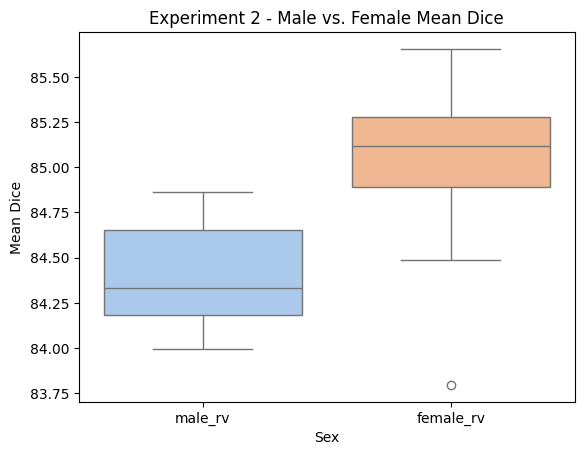

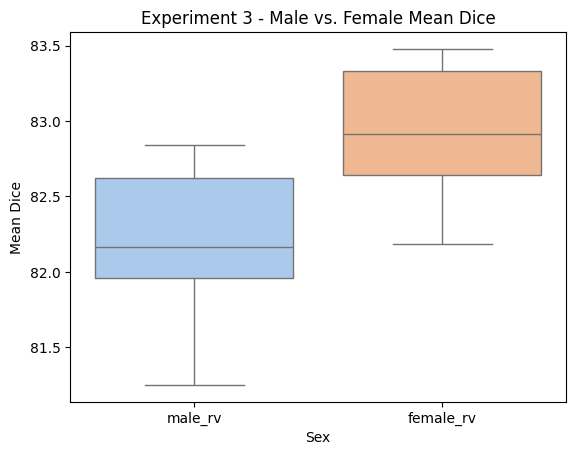

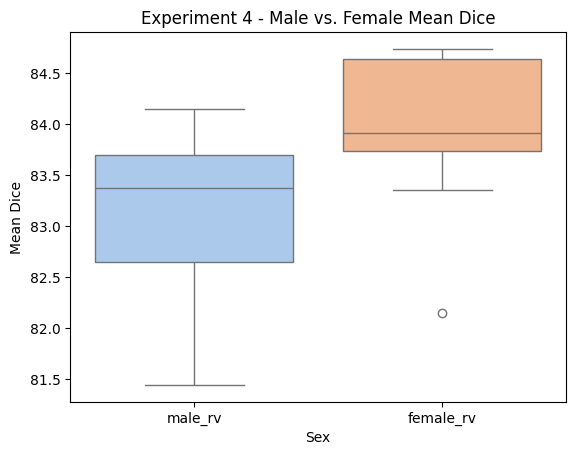

In [23]:
boxplot_sex_dice(sex_df, 'male_rv', 'female_rv')

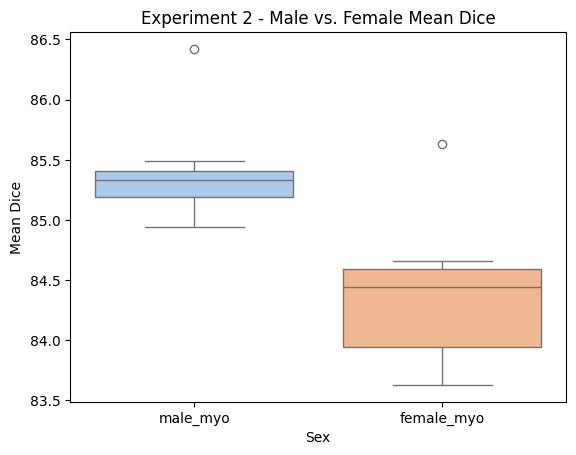

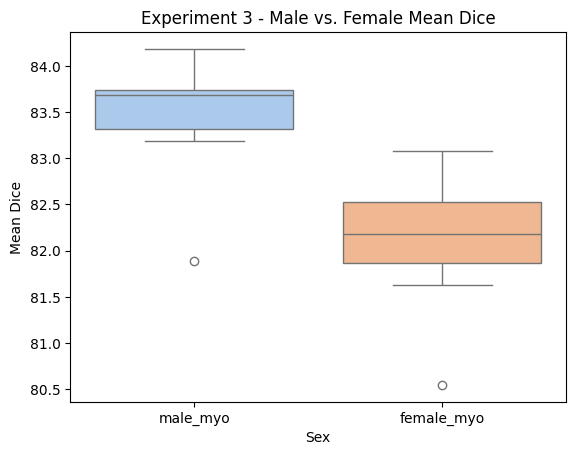

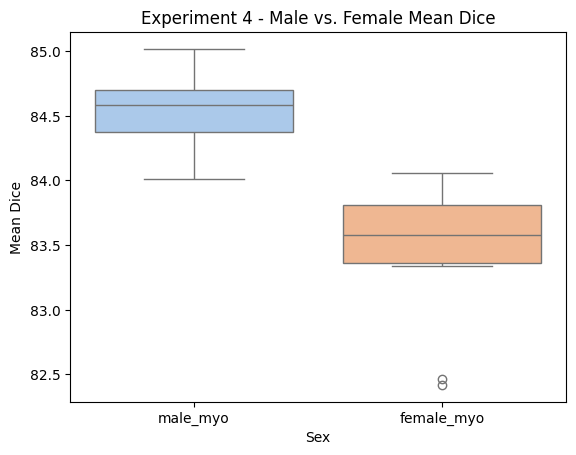

In [24]:
boxplot_sex_dice(sex_df, 'male_myo', 'female_myo')

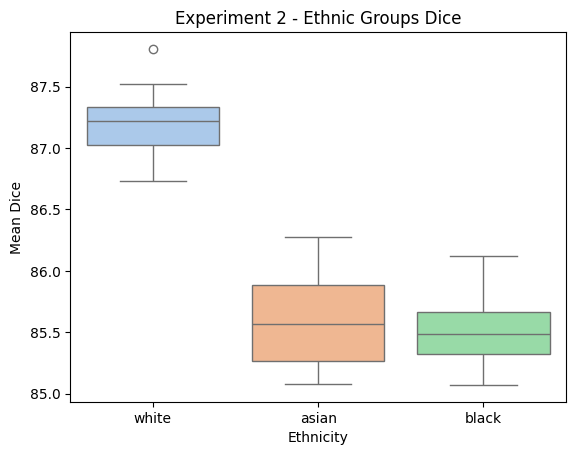

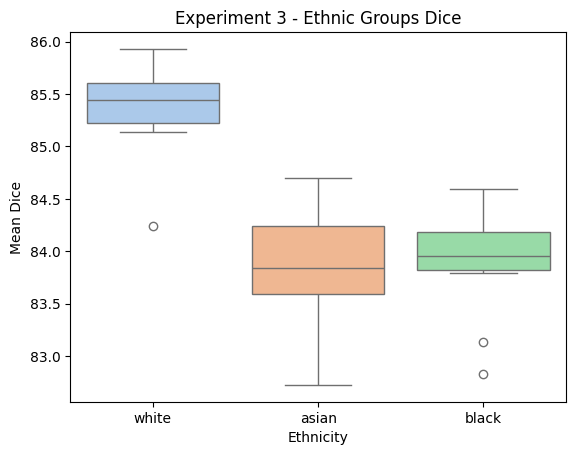

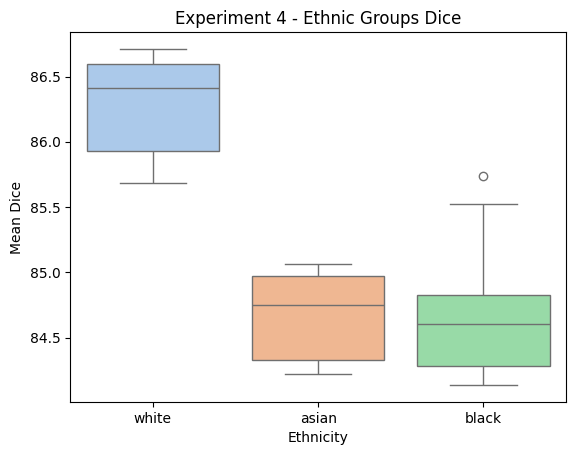

In [25]:
boxplot_ethn_dice(sex_df)

UKBB Test Data - Sex Controlled -  962 Patients


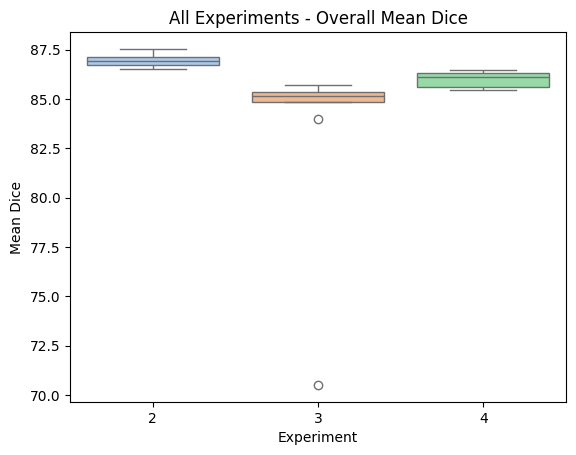

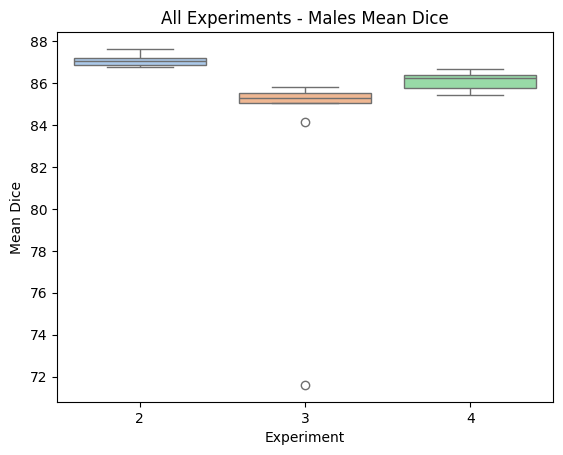

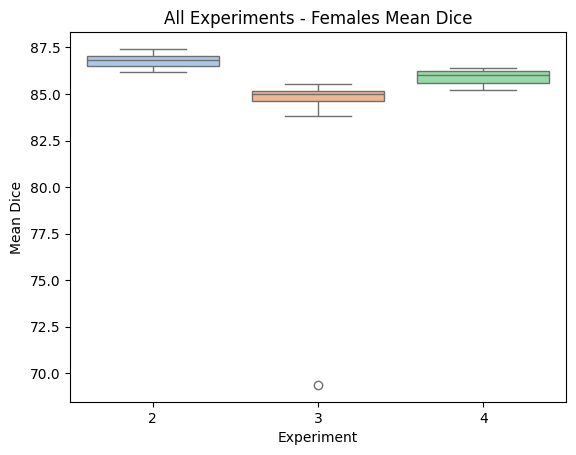

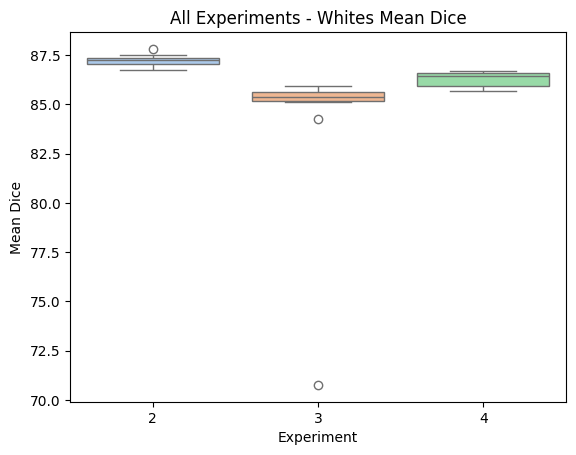

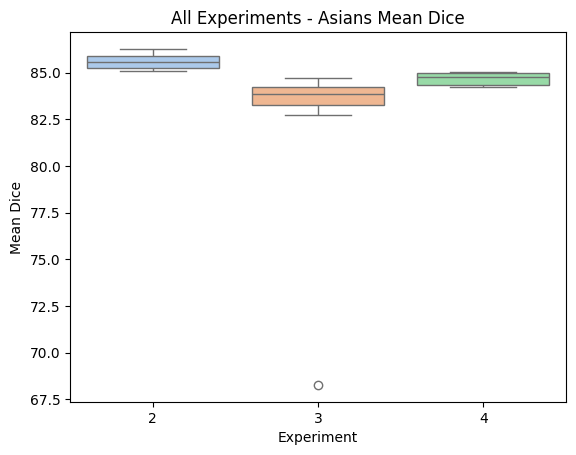

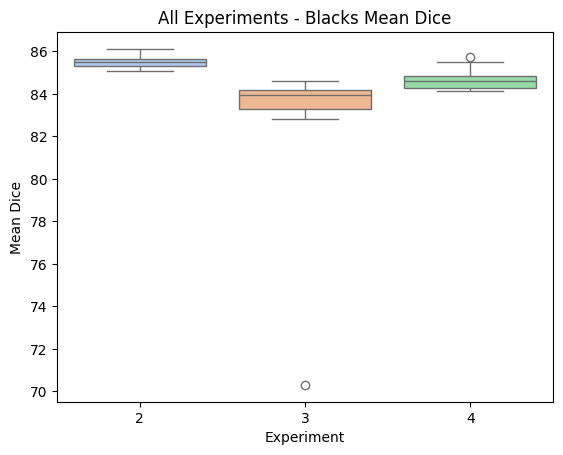

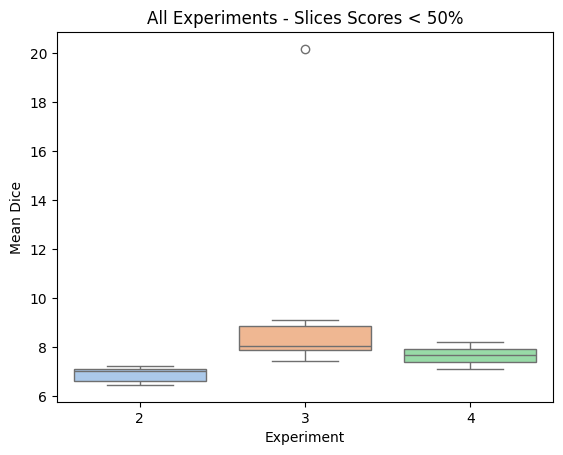

In [33]:
print(cfg['data_desc'])
plot_exps(sex_df)

## Ethnicity Controlled Test Set Results

In [34]:
ethn_df = pd.DataFrame(columns=columns)

for exp, _ in EXPERIMENTS.items():
    cfg = load(open(f'configs/ukbb/test/exp{exp}/ethn.yaml', 'r'), Loader=Loader)
    for seed in SEEDS:
        test_ethn_df = pd.read_csv(f'outputs/results/csv/ukbb/exp{exp}/seed{seed}/ethn.csv')
        test_ethn_merged_df = merge_results_patients(test_ethn_df, patients_df)
        res_df = get_all_results(test_ethn_merged_df, cfg)
        ethn_df = pd.concat([ethn_df, res_df], ignore_index=True)

/tmp/ipykernel_3718634/1028471736.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ethn_df = pd.concat([ethn_df, res_df], ignore_index=True)


UKBB Test Data - Ethnicity Controlled -  108 Patients


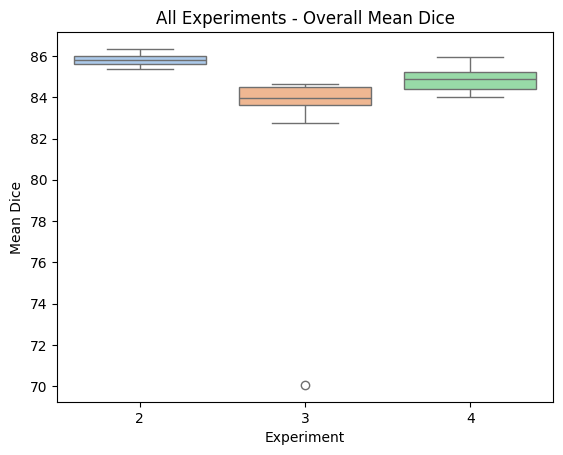

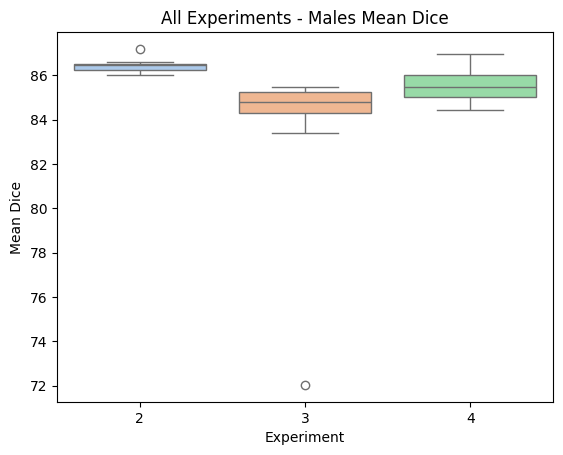

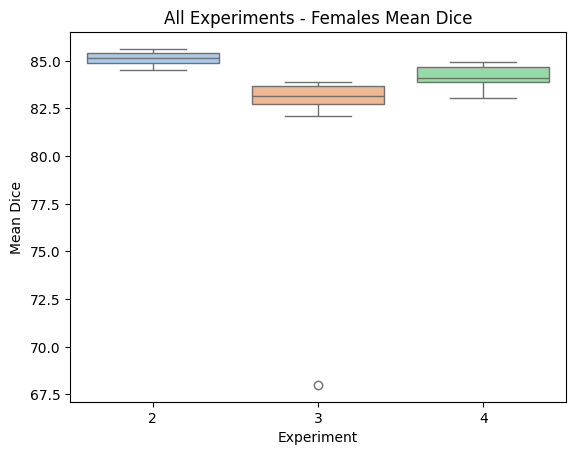

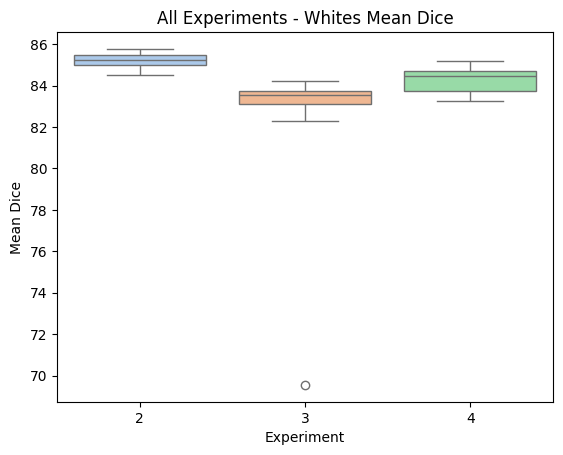

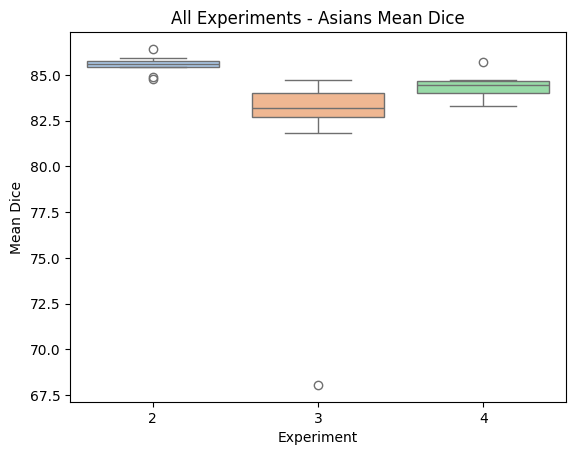

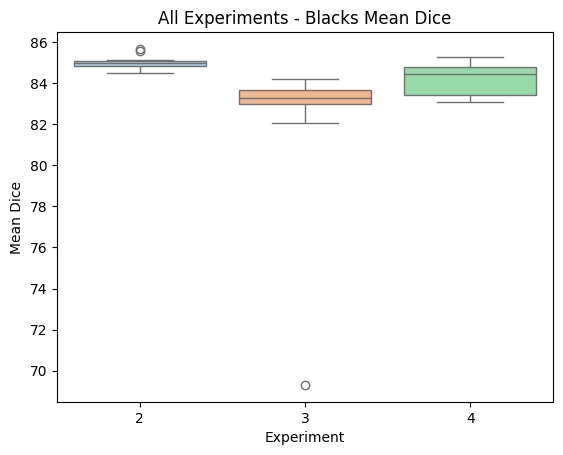

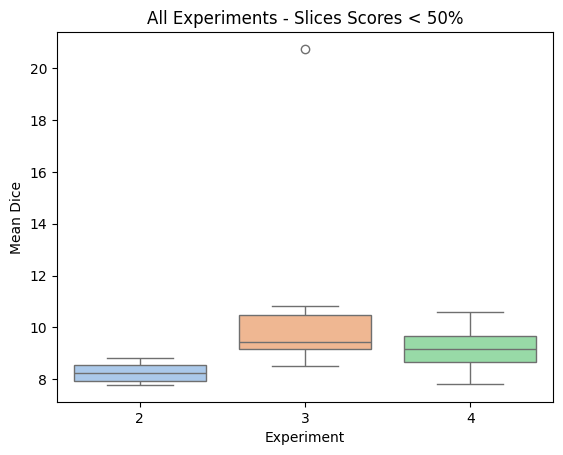

In [35]:
print(cfg['data_desc'])
plot_exps(ethn_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


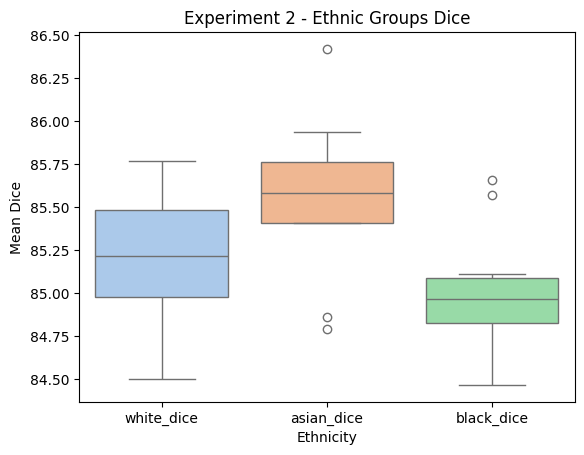

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


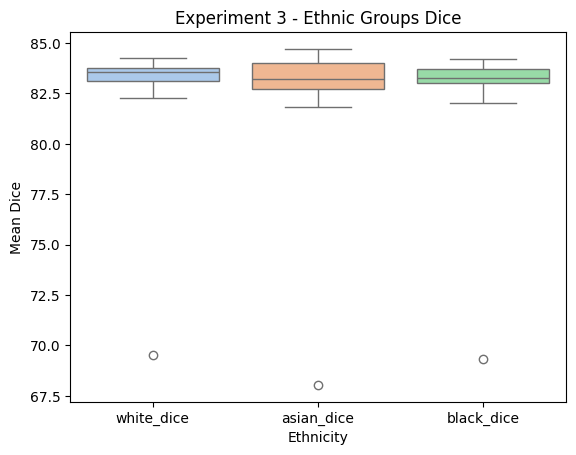

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


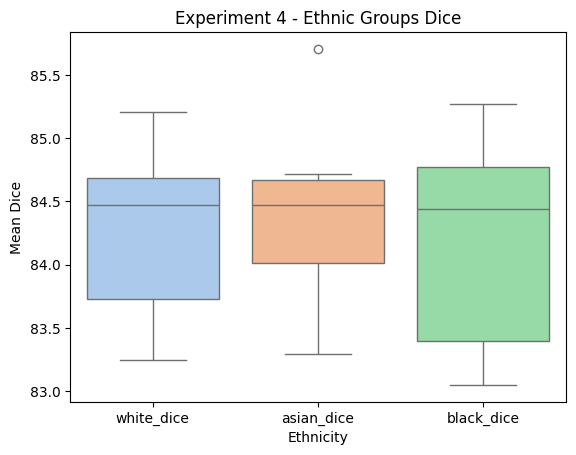

In [53]:
boxplot_ethn_dice(ethn_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


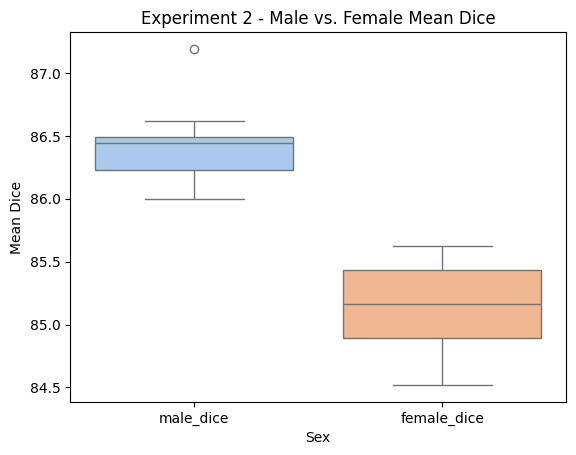

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


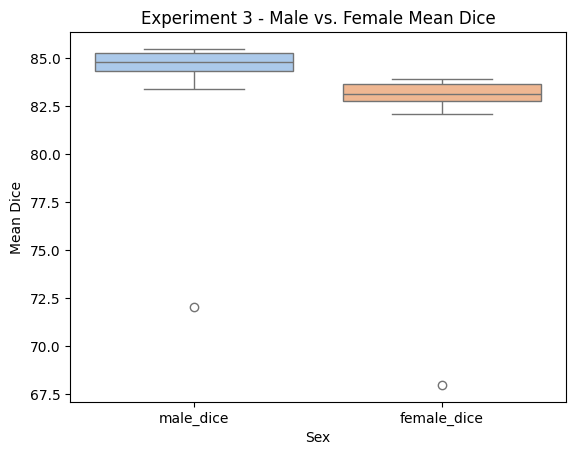

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


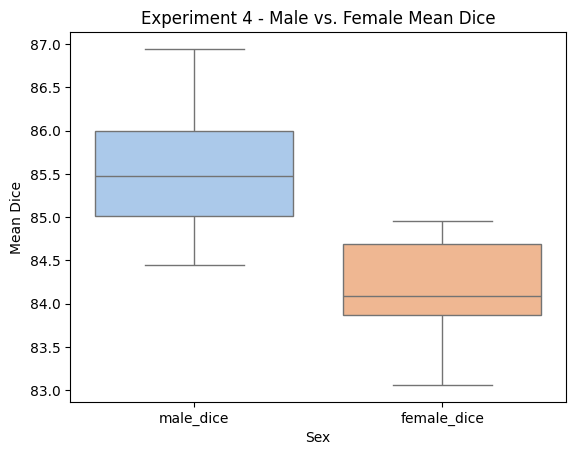

In [54]:
boxplot_sex_dice(ethn_df)